In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

In [3]:
#loading data
Train_Data = pd.read_csv("data_set_ALL_AML_train.csv")
Test_Data = pd.read_csv("data_set_ALL_AML_independent.csv")
Actual = pd.read_csv("actual.csv")

In [4]:
#checking for null values
print(Train_Data.isna().sum().max())
print(Test_Data.isna().sum().max())

0
0


In [5]:
Train_Data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
Test_Data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [7]:
#checking for object features in the dataset
data_object=Train_Data.select_dtypes(include=['object']) 
data_object.head()

,Gene Description,Gene Accession Number,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,...,call.28,call.29,call.30,call.31,call.32,call.33,call.34,call.35,call.36,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,P,A,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A


In [8]:
#checking for non-object features
data_float_train = Train_Data.select_dtypes(include=['int64','int32','float64'])
data_float_test=Test_Data.select_dtypes(include=['int64','int32','float64'])
data_float_test.head()

,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
0,-342,-87,22,-243,-130,-256,-62,86,-146,-187,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,41,262,17,-163,-28,-410,-7,-141,170,312,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,328,295,276,182,266,24,142,252,174,142,...,319,178,340,31,396,141,95,146,431,9
4,-224,-226,-211,-289,-170,-535,-233,-201,-32,114,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [9]:
#concat all the numerical features
column_names_test = list(data_float_test.columns.values)
column_names_train = list(data_float_train.columns.values)
patients=column_names_train+column_names_test

In [10]:
data=pd.concat([data_float_train,data_float_test],axis=1)[patients]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,54,57,58,60,61,65,66,63,64,62
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,-58,-1,-307,265,-76,215,238,7,106,42,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,88,283,309,12,168,71,55,-2,268,219,...,319,178,340,31,396,141,95,146,431,9
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [11]:
# Transpose so that each row matches a patient
data=data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [12]:
data["patient"] = pd.to_numeric(patients)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5


In [13]:
# AML is 1, MML is 0
Actual["cancer"]= pd.get_dummies(Actual.cancer, drop_first=True)

In [14]:
# add the cancer column to train data
Data = pd.merge(data, Actual, on="patient")

In [15]:
# split in train and test, firts 38 are train, the rest is test
Train_Data, Test_Data = Data.iloc[:39,:], Data.iloc[39:,:]

In [16]:
Train_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


In [17]:
X_train, y_train= Train_Data.drop(columns=["cancer"]), Train_Data["cancer"]
X_test, y_test = Test_Data.drop(columns=["cancer"]), Test_Data["cancer"]

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [24]:
# Feature Extraction With PCA
# Applying PCA
from sklearn.decomposition  import PCA
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_train_pca

array([[ 1.84130577e+01,  5.56741660e+00, -2.04677482e+01, ...,
        -3.25834860e+00, -3.94958799e-01,  1.43258654e-14],
       [-7.28767344e+00,  1.09084816e+01,  1.28909437e+01, ...,
         3.81128365e+00, -4.05365778e-01,  1.43258654e-14],
       [ 5.26942482e+01,  1.12773035e+01, -2.91592876e+01, ...,
        -2.92122062e+00,  3.81453500e+00,  1.43258654e-14],
       ...,
       [ 3.14946988e+01, -8.20108127e+00,  1.01781892e+01, ...,
         2.37449494e+00,  4.42525019e-01,  1.43258654e-14],
       [ 7.48875304e+01, -2.22783005e+01,  4.00446191e+01, ...,
         7.80926269e-01,  1.77070105e+00,  1.43258654e-14],
       [ 3.68166321e-01, -2.07285758e+01, -2.36784736e+01, ...,
         6.01998733e-01, -2.52058504e-01,  1.43258654e-14]])

In [25]:
#Eigenvalues (sum of squares of the distance between the projected data points and the origin along the eigenvector)
print(pca.explained_variance_)

[1.06802717e+03 8.62502372e+02 4.79077806e+02 3.46676956e+02
 3.37068034e+02 2.84432483e+02 2.55512507e+02 2.35186758e+02
 2.11402732e+02 1.97251485e+02 1.78718385e+02 1.69974664e+02
 1.66083286e+02 1.55910392e+02 1.44871521e+02 1.37154374e+02
 1.33841151e+02 1.27926523e+02 1.20445326e+02 1.20120610e+02
 1.15948399e+02 1.08072171e+02 1.06759970e+02 1.02982406e+02
 1.00896356e+02 9.94465123e+01 9.71976381e+01 9.51740609e+01
 9.24356427e+01 9.19685899e+01 8.62090022e+01 8.16609491e+01
 7.89488996e+01 7.26534855e+01 7.02969461e+01 6.51291770e+01
 6.07936790e+01 5.88731579e+01 2.10631220e-28]


In [26]:
#Explained variance ratio (i.e. how much of the change in the variables is explained by change in the respective principal component): eigenvalue/(n variables)
print(pca.explained_variance_ratio_)

[1.45952575e-01 1.17866329e-01 6.54689705e-02 4.73755685e-02
 4.60624493e-02 3.88694730e-02 3.49173779e-02 3.21397375e-02
 2.88895020e-02 2.69556458e-02 2.44229821e-02 2.32280981e-02
 2.26963170e-02 2.13061276e-02 1.97975970e-02 1.87430007e-02
 1.82902281e-02 1.74819573e-02 1.64596051e-02 1.64152306e-02
 1.58450720e-02 1.47687363e-02 1.45894159e-02 1.40731882e-02
 1.37881164e-02 1.35899862e-02 1.32826635e-02 1.30061291e-02
 1.26319072e-02 1.25680815e-02 1.17809979e-02 1.11594781e-02
 1.07888596e-02 9.92855197e-03 9.60651617e-03 8.90030829e-03
 8.30783544e-03 8.04538425e-03 2.87840701e-32]


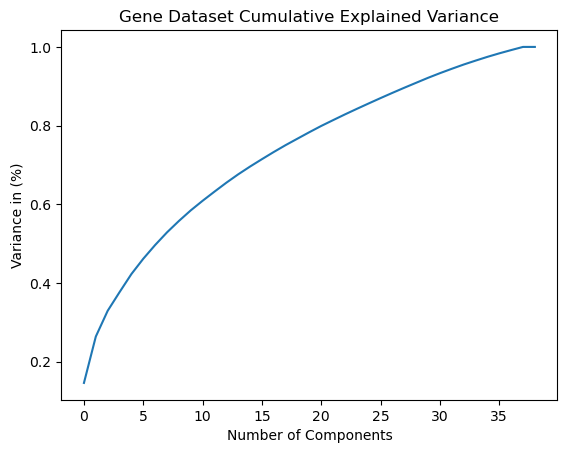

In [27]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance in (%)') #for each component
plt.title('Gene Dataset Cumulative Explained Variance')
plt.show()

In [28]:
## Calculating Explained Variance up to 90% of the variance
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
      current_variance += pca.explained_variance_[k]
      k = k + 1
k

29

[14.6  26.39 32.94 37.68 42.29 46.18 49.67 52.88 55.77 58.47 60.91 63.23
 65.5  67.63 69.61 71.48 73.31 75.06 76.71 78.35 79.93 81.41 82.87 84.28
 85.66 87.02 88.35 89.65 90.91]


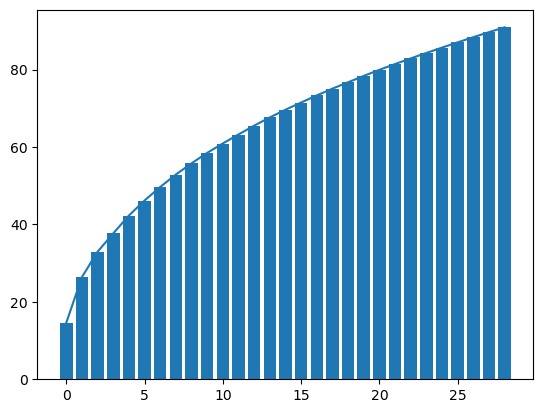

In [29]:
#Applying PCA for selecting N Components
from sklearn.decomposition  import PCA
pca = PCA(n_components = k )
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [20]:
import warnings

# Filter out the specific FutureWarning related to feature names
warnings.filterwarnings("ignore")


In [21]:
#using Decision Tree classifier
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

	# Creating the classifier object 
	clf_gini = DecisionTreeClassifier(criterion = "gini", 
			random_state = 100,max_depth=3, min_samples_leaf=5) 

	# Performing training 
	clf_gini.fit(X_train, y_train) 
	return clf_gini 
	
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
			criterion = "entropy", random_state = 100, 
			max_depth = 3, min_samples_leaf = 5) 

	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

	# Predicton on test with giniIndex 
	y_pred = clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", 
		confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ", 
	accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", 
	classification_report(y_test, y_pred)) 

# Driver code 
def main(): 
	
	# Building Phase 
	X_train, y_train,X_test, y_test= Train_Data.drop(columns=["cancer"]), Train_Data["cancer"],Test_Data.drop(columns=["cancer"]), Test_Data["cancer"]
	clf_gini = train_using_gini(X_train, X_test, y_train) 
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
	
	# Operational Phase 
	print("Results Using Gini Index:") 
	
	# Prediction using gini 
	y_pred_gini = prediction(X_test, clf_gini) 
	cal_accuracy(y_test, y_pred_gini) 
	
	print("Results Using Entropy:") 
	# Prediction using entropy 
	y_pred_entropy = prediction(X_test, clf_entropy) 
	cal_accuracy(y_test, y_pred_entropy) 
	
	
# Calling main function 
if __name__=="__main__": 
	main() 

Results Using Gini Index:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
Confusion Matrix:  [[17  2]
 [ 1 13]]
Accuracy :  90.9090909090909
Report :                precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.87      0.93      0.90        14

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33

Results Using Entropy:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
Confusion Matrix:  [[17  2]
 [ 1 13]]
Accuracy :  90.9090909090909
Report :                precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.87      0.93      0.90        14

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91   

In [22]:
#using Random forest
X_train, y_train,X_test, y_test= Train_Data.drop(columns=["cancer"]), Train_Data["cancer"],Test_Data.drop(columns=["cancer"]), Test_Data["cancer"]
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 
  
# performing predictions on the test dataset 
y_pred = clf.predict(X_test) 
  
# metrics are used to find accuracy or error 
from sklearn import metrics   
print() 
  
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7575757575757576


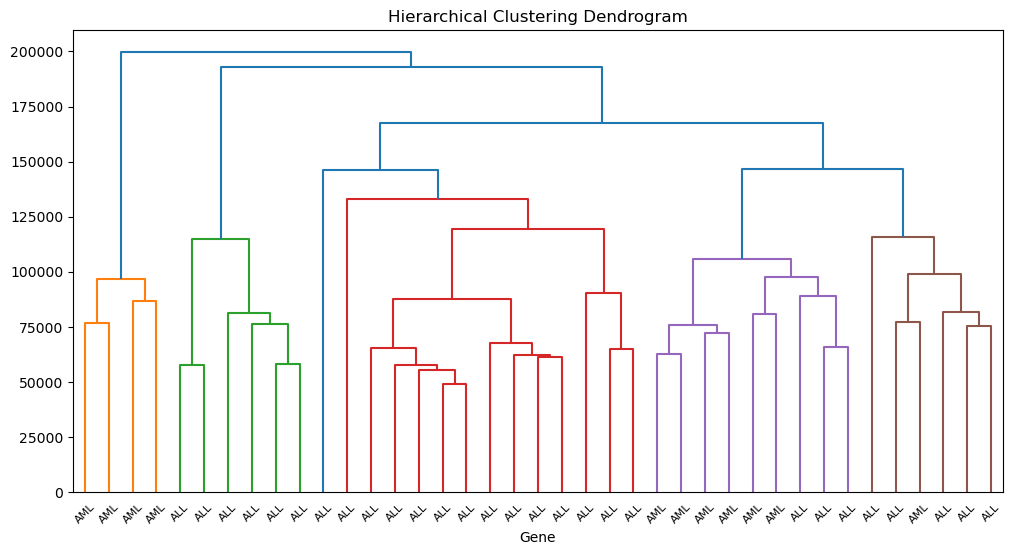

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist


# Extract the expression data (excluding metadata columns like 'patient' and 'cancer')
expression_data =Train_Data.iloc[:, :-2]

# Calculate the pairwise Euclidean distances
distance_matrix = pdist(expression_data)

# Perform hierarchical clustering using linkage method (e.g., 'ward')
linkage_matrix = linkage(distance_matrix, method='ward')

# Load your "Actual" DataFrame with labels
Actual = pd.read_csv("actual.csv")

# Merge the "cancer" column from the "Actual" DataFrame with the data
Data = pd.merge(data, Actual, on="patient")

# Split data into training and test sets
Train_Data, Test_Data = Data.iloc[:39, :], Data.iloc[39:, :]

# Use the "cancer" column as labels for the dendrogram
labels = Train_Data["cancer"].values  # Use .values to get a NumPy array

# Generate the dendrogram with labels
plt.figure(figsize=(12, 6))
dm = dendrogram(linkage_matrix, orientation='top', labels=labels)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Gene")
plt.show()


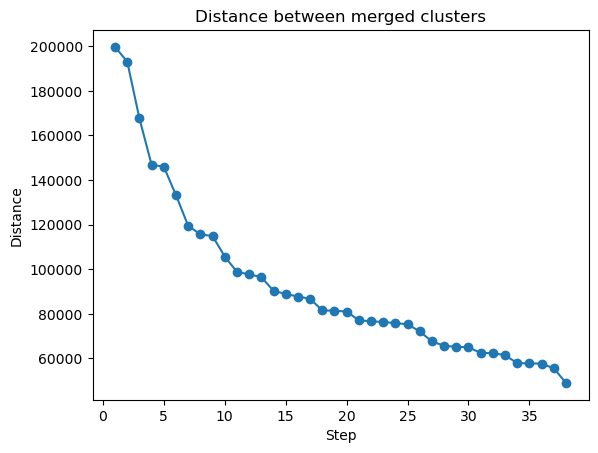

In [33]:
# Extract the distances at which clusters are merged
distances = linkage_matrix[:, 2]

# Reverse the distances array for better visualization
dist_rev = distances[::-1]

# Create an array of indices
idxs = range(1, len(distances) + 1)

# Create a line plot to visualize the distances
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.show()